In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-data/data.csv


### Importing the required Libraries

Below are the necessary libraries which are used to perform EDA(Exploratory Data Ananlysis)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the data into Dataframe

<p>Loading the data into the pandas data frame, which is the first step in EDA. <br>
Read the .csv file using 'read_csv()' function from pandas library and each data is separated by the delimiter ',' in given dataset.</p>

In [6]:
df = pd.read_csv('../input/pubg-data/data.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


Returned the first 5 observations from the dataset with the help of ".head()" function, we can also get the last 5 observation with the help of ".tail()" function provided by the pandas library.

### Get the Size of the Dataset

We can get the Total number of Observations (rows) and Features (columns) from the dataset using ".shape".

In [7]:
df.shape

(1111742, 30)

### Checking the types of the Data

With the help of ".info()" function, we can find the data types of each Column it contains and if they contain any value in it or not.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

<ul><b>By observing the above data, we can conclude -----</b>
    <li>Data contains 20 integer values, 6 float values and 4 object values.</li>
    <li>All the columns variables are non-null (i.e no empty values are there)</li>
</ul>

### Statistical Description about the Data

Another useful function in pandas is ".describe()" which provides the count, mean, standard deviation, minimum and maximum values and the quantities of the data.

In [9]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


##### From the above data, we can conclude that there are some columns of which mean value is less than the median(50%) and some columns have mean value greater than the median(50%).

### Dropping Unnecessary Features or Columns


In [10]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int64  
 4   boosts           1111742 non-null  int64  
 5   damageDealt      1111742 non-null  float64
 6   DBNOs            1111742 non-null  int64  
 7   headshotKills    1111742 non-null  int64  
 8   heals            1111742 non-null  int64  
 9   killPlace        1111742 non-null  int64  
 10  killPoints       1111742 non-null  int64  
 11  kills            1111742 non-null  int64  
 12  killStreaks      1111742 non-null  int64  
 13  longestKill      1111742 non-null  float64
 14  matchDuration    1111742 non-null  int64  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

In [11]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

We can see that, in <b>'winPlacePerc'</b> column, a null value is present there. So we will convert that null value with the column's mean value.

In [12]:
df['winPlacePerc'] = df['winPlacePerc'].fillna(np.mean(df['winPlacePerc']))
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

Now we can see that, no null value is present there.

### Checking for Duplicate Rows

In this dataset there is no duplicate row.

In [13]:
print('Shape of Data :',df.shape)
duplicate_rows = df[df.duplicated(keep='first')]
print('Number of Duplicates Rows :',duplicate_rows.shape)

Shape of Data : (1111742, 29)
Number of Duplicates Rows : (0, 29)


In [14]:
for i in ['Id', 'groupId', 'matchId']:
    print('Count of',i,':',df[i].nunique())

Count of Id : 1111742
Count of groupId : 870622
Count of matchId : 47951


From the above data, we can conclude that there are some columns of which mean value is less than the median(50%) and some columns have mean value greater than the median(50%). <br>

In [15]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06
mean,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073770e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


## Univariate Ananlysis

1. We explore variables one by one<br>
2. Method to perform uni-variate analysis will depend on whether the variable type is categorical(text) or continuous(numerical or other).

<h4 style='color:#00bfff'>Continuous Variable Analysis </h4>
<ul>
    <li>Measure of Central tendency(Mean, Median, Mode) of the variables</li>
    <li>Measure of spread(Range, IQR, Variance, Standard Deviation) of the variables</li>
    <li>Measure of shape(Symmetrical or Normal Distribution, Asymmetrical or Left/Right Skewed Distribution etc) of the variables</li>
</ul>    

<h4 style='color:#00bfff'>Categorical Variable Analysis</h4>
<ul>
    <li>For categorical variable, we will use Frequency Distribution of each category e.g. histogram, bar chart, pie chart</li>
</ul>   

<b>Analyze individual column:</b> Using the below function we can easily analyze to visualize the <b>Distribution</b> of the data, detection of the outlier, also using the <b>boxplot</b>.

### Find out Outliers

We know, Q3 & Q1 and IQR=Q3-Q1, any data point which is less than Q1–1.5IQR or Q3+1.5IQR are considered as outliers.

In [16]:
def find_outliers(col):
    outliers = []
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    print('Q1:',Q1,', Q3:',Q3,', IQR:',IQR,', Lower_extreme:',lower_limit,', Upper_extreme:', upper_limit)
    
    for i in df[col]:
        if (i > upper_limit) or (i < lower_limit):
            outliers.append(i)
            
    return outliers

In [17]:
def box_dist_plot(col):
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(14, 4))
    sns.boxplot(x=df[col], ax=ax1)
    ax1.set_title('Boxplot of {}'.format(df[col].name))
    sns.distplot(df[col], ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(df[col].name))
    df[col].hist(ax=ax3)
    ax3.set_title('Histogram plot of {}'.format(df[col].name))
    
    fig.tight_layout()
    
def analysis(col):
    print('Mean :', df[col].mean())
    print('Median :', df[col].median())
    print('Std :', df[col].std())
    print('Missing value :', df[col].isnull().sum(), '\n')
    
    box_dist_plot(col)

Mean : 0.23367382000500117
Median : 0.0
Std : 0.5894028362493307
Missing value : 0 

Mean : 1.1066551412108205
Median : 0.0
Std : 1.7160502611145143
Missing value : 0 

Mean : 130.73640731140858
Median : 84.11
Std : 171.17553840586402
Missing value : 0 

Mean : 0.6573611503388376
Median : 0.0
Std : 1.14602304052777
Missing value : 0 

Mean : 0.22664880880635974
Median : 0.0
Std : 0.6033356365129713
Missing value : 0 

Mean : 1.3703476166232813
Median : 0.0
Std : 2.6838189115517483
Missing value : 0 

Mean : 47.59562200582509
Median : 47.0
Std : 27.4702474330614
Missing value : 0 

Mean : 504.43011687963576
Median : 0.0
Std : 627.4006162041507
Missing value : 0 

Mean : 0.9255096955948412
Median : 0.0
Std : 1.5622155147969192
Missing value : 0 

Mean : 0.544850333980366
Median : 0.0
Std : 0.7129031766396441
Missing value : 0 

Mean : 22.998138770146305
Median : 0.0
Std : 51.06976718866773
Missing value : 0 

Mean : 1579.347832500706
Median : 1438.0
Std : 258.9347686175266
Missing value 

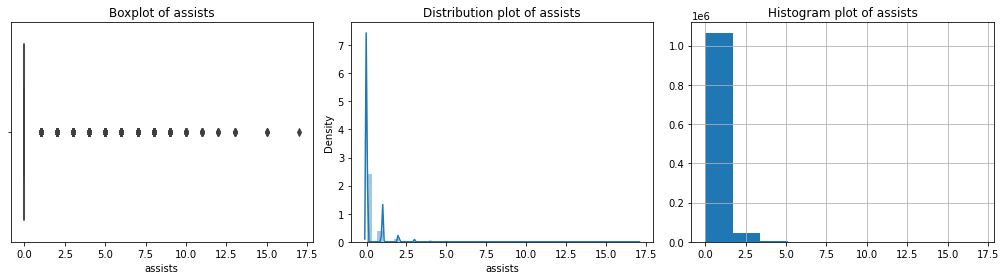

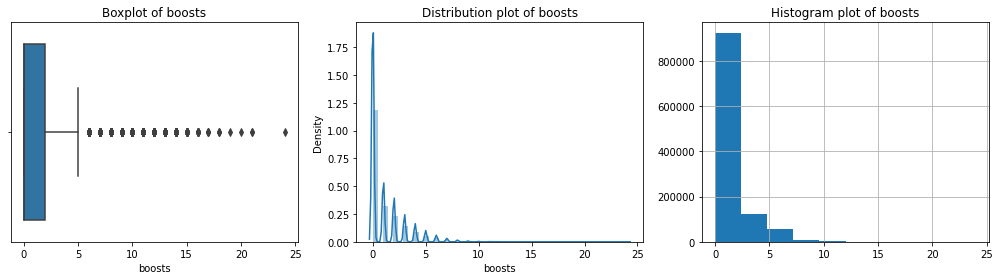

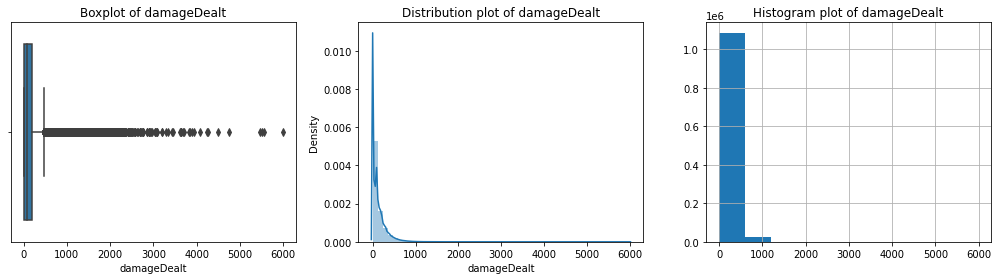

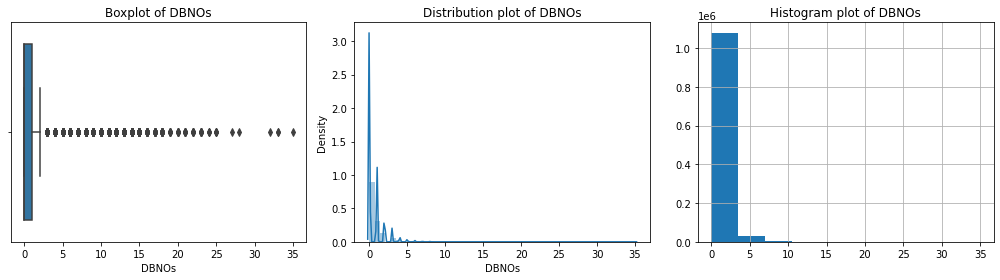

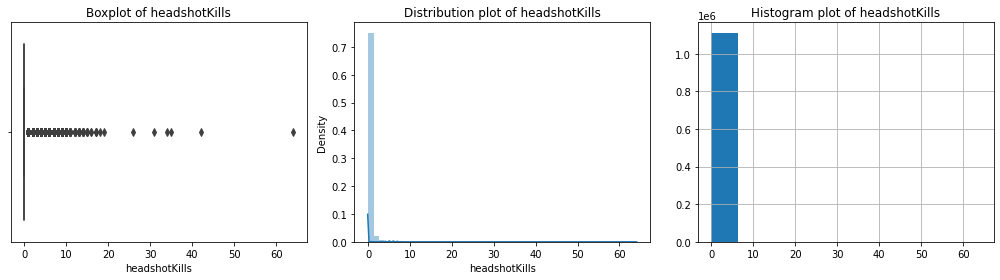

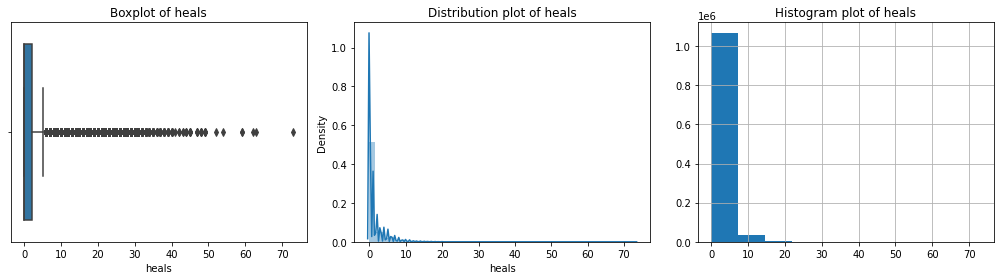

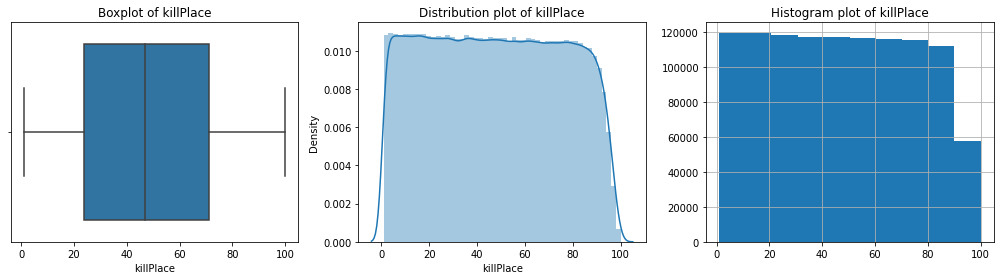

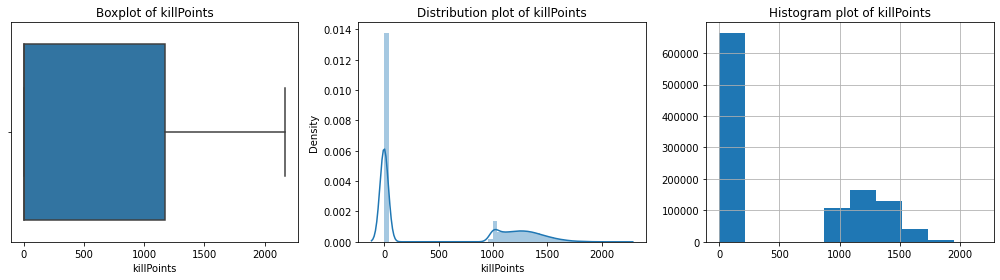

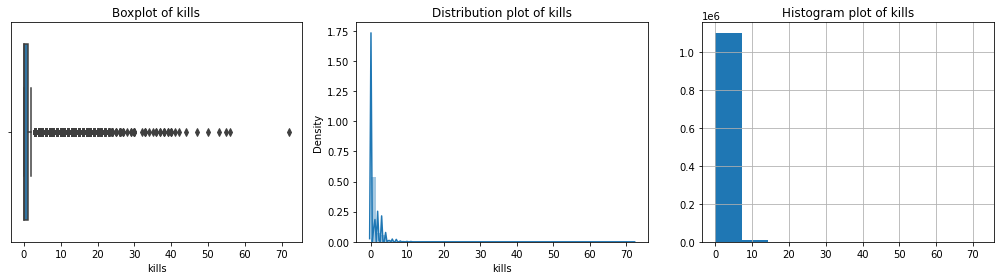

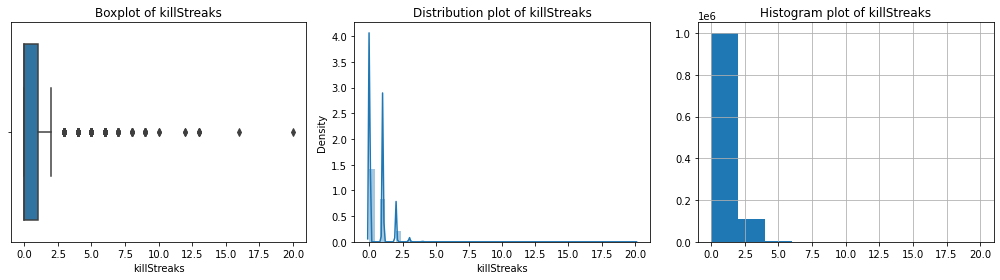

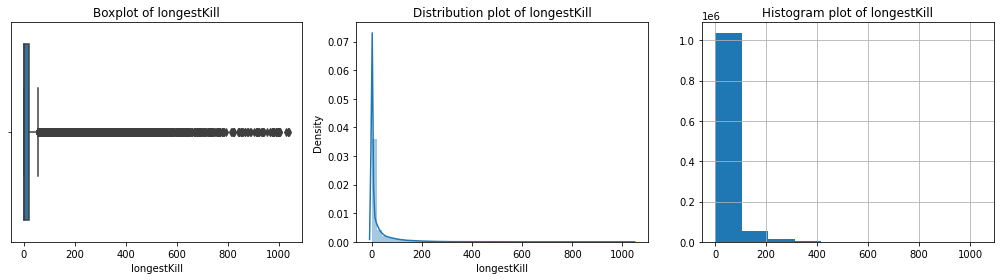

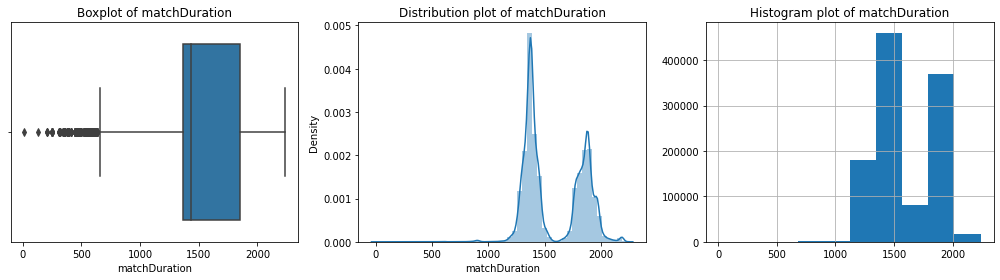

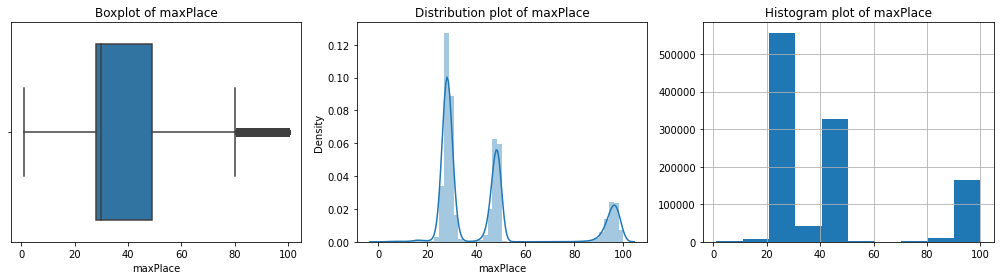

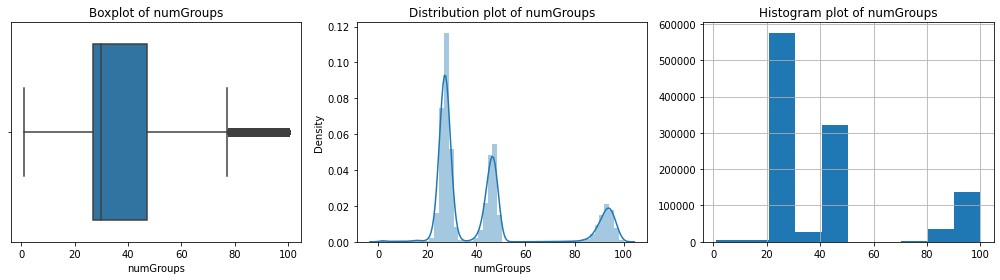

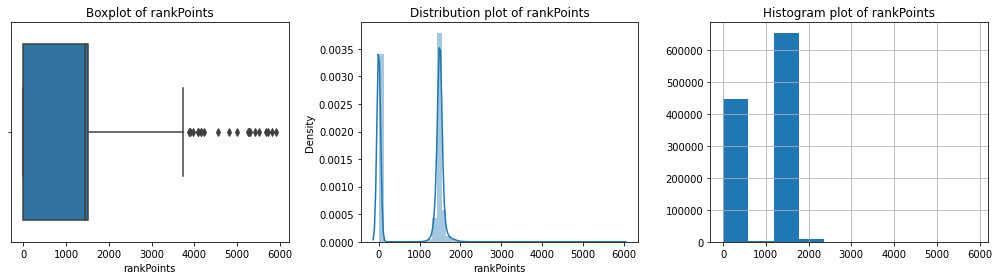

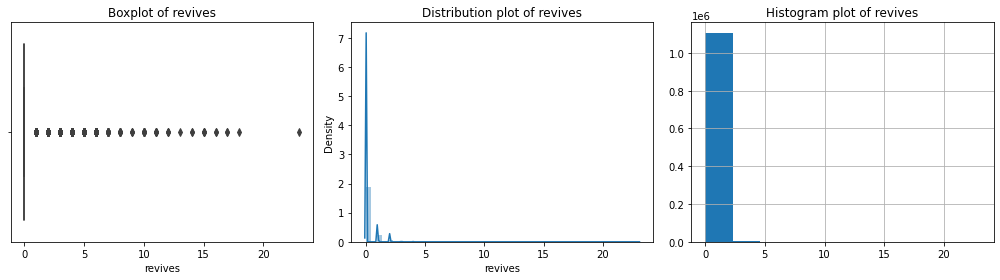

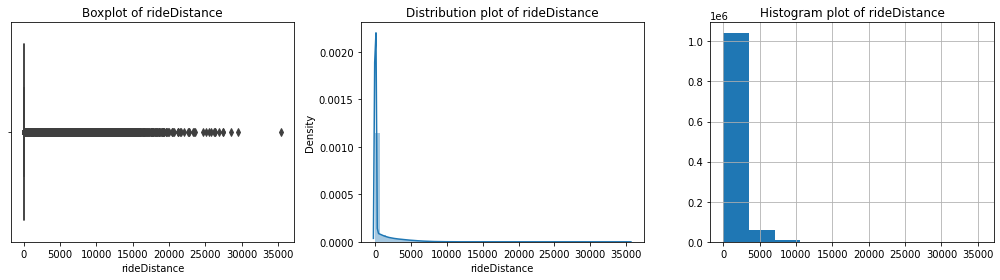

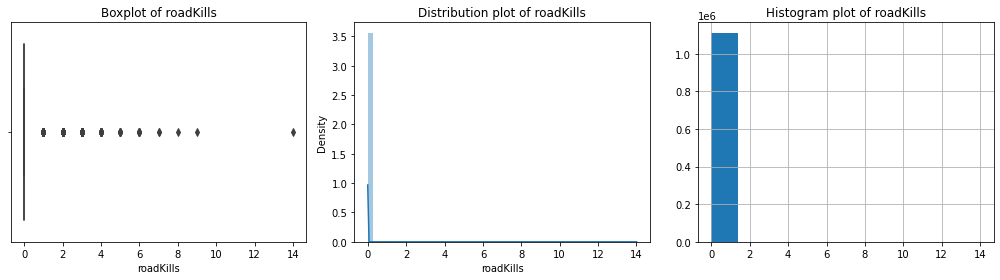

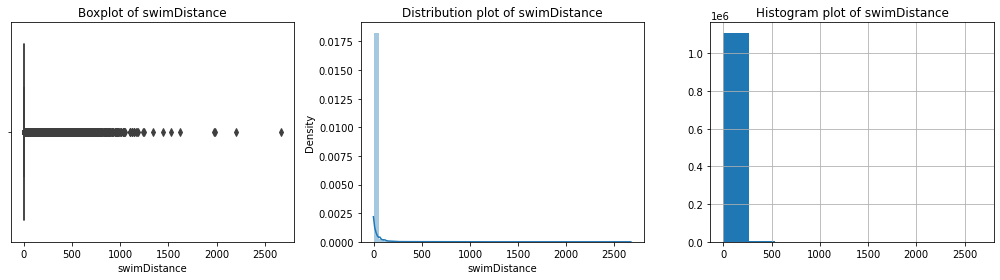

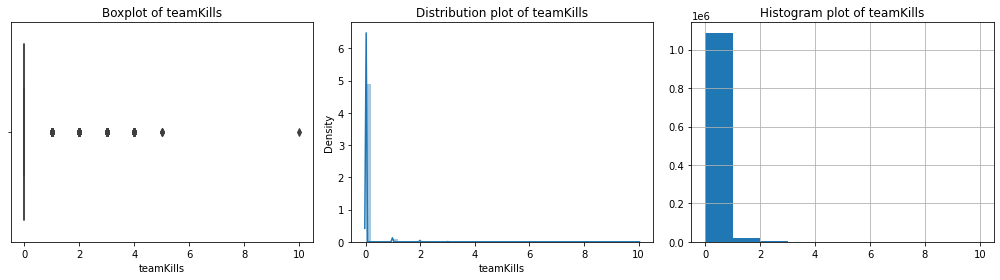

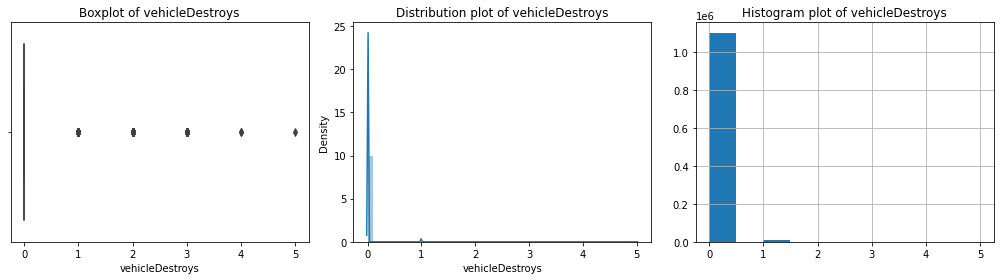

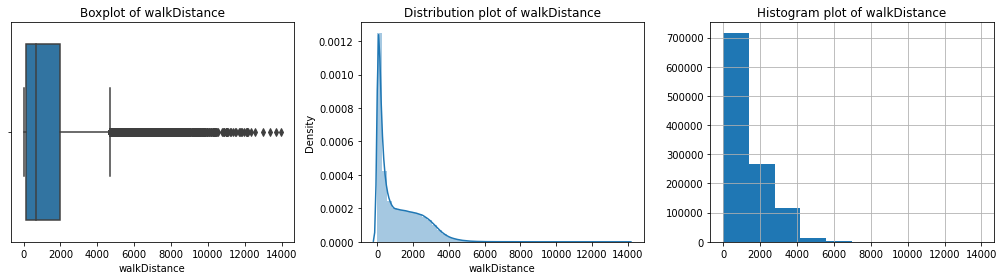

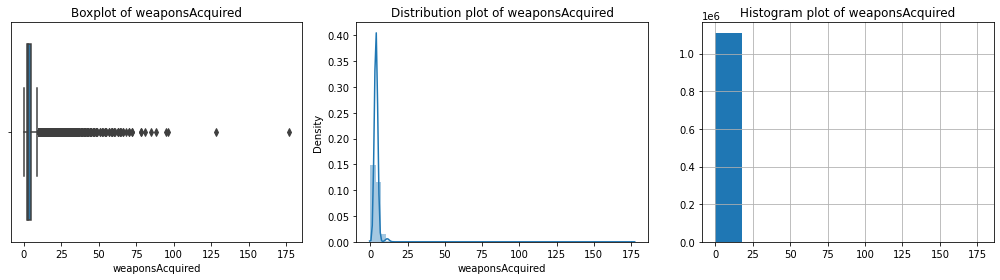

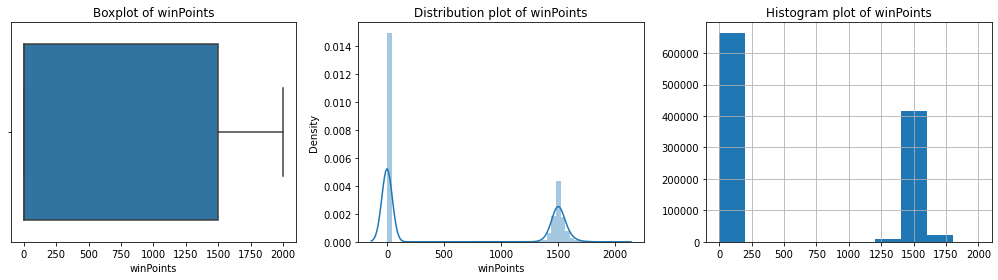

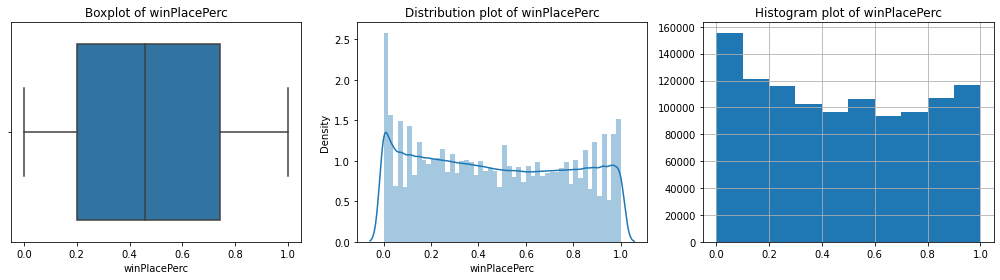

In [18]:
for i in df.columns:
    if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
        analysis(i)

#### We can observe from the above plots, there are many features that have huge number of outliers and some have no outliers, some are extremely Right-skewed, some are Uniformally distributed. Same in the histograms also.

In [19]:
print('---'*10, 'Number of Outliers','---'*10,'\n')
for i in df.columns:
    if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
        print(i , ':', len(find_outliers(i)), '\n')

------------------------------ Number of Outliers ------------------------------ 

Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_extreme: 0.0 , Upper_extreme: 0.0
assists : 194611 

Q1: 0.0 , Q3: 2.0 , IQR: 2.0 , Lower_extreme: -3.0 , Upper_extreme: 5.0
boosts : 35533 

Q1: 0.0 , Q3: 185.9 , IQR: 185.9 , Lower_extreme: -278.85 , Upper_extreme: 464.75
damageDealt : 54026 

Q1: 0.0 , Q3: 1.0 , IQR: 1.0 , Lower_extreme: -1.5 , Upper_extreme: 2.5
DBNOs : 73607 

Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_extreme: 0.0 , Upper_extreme: 0.0
headshotKills : 187930 

Q1: 0.0 , Q3: 2.0 , IQR: 2.0 , Lower_extreme: -3.0 , Upper_extreme: 5.0
heals : 81625 

Q1: 24.0 , Q3: 71.0 , IQR: 47.0 , Lower_extreme: -46.5 , Upper_extreme: 141.5
killPlace : 0 

Q1: 0.0 , Q3: 1171.0 , IQR: 1171.0 , Lower_extreme: -1756.5 , Upper_extreme: 2927.5
killPoints : 0 

Q1: 0.0 , Q3: 1.0 , IQR: 1.0 , Lower_extreme: -1.5 , Upper_extreme: 2.5
kills : 129163 

Q1: 0.0 , Q3: 1.0 , IQR: 1.0 , Lower_extreme: -1.5 , Upper_extreme: 2.5
killSt

### Bivariate Analysis
HeatMaps: Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps

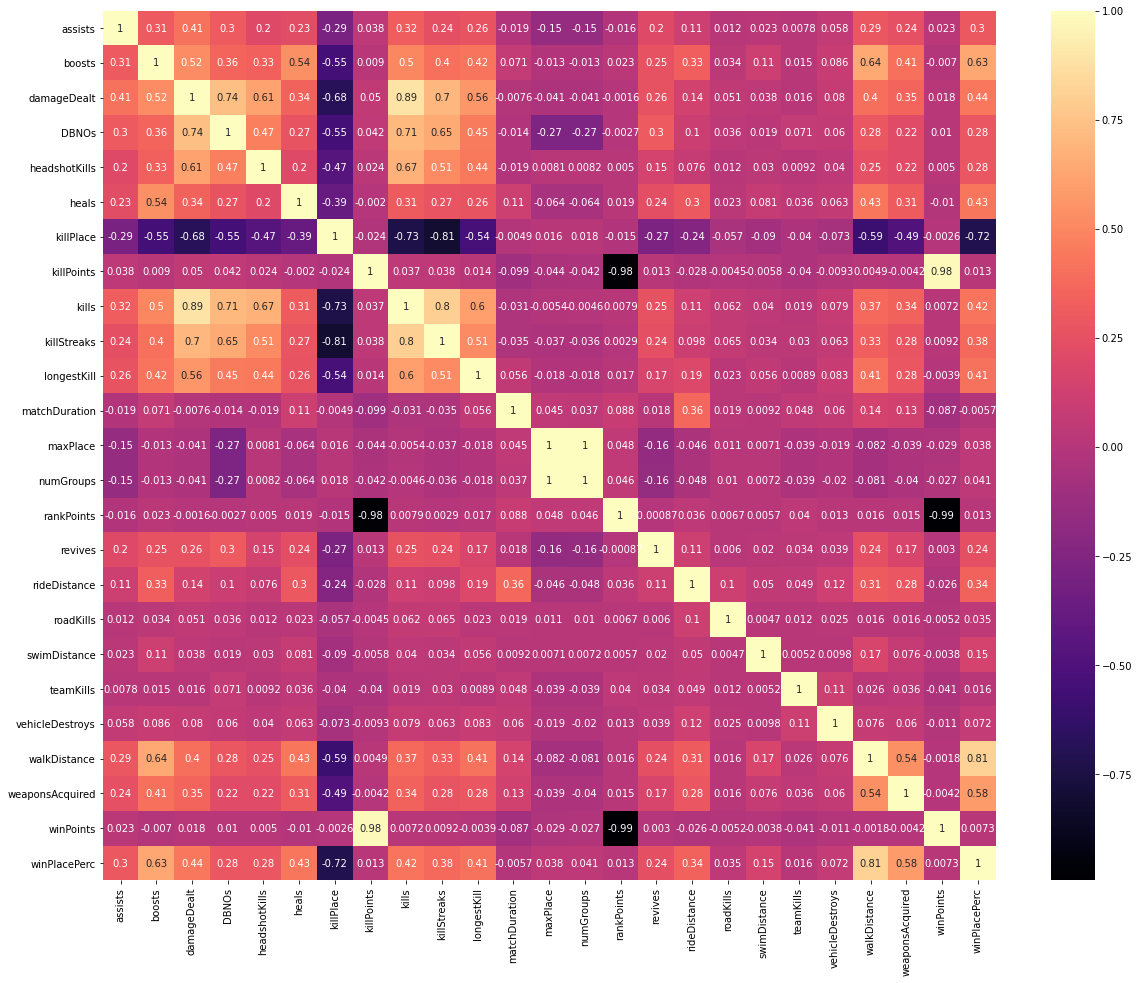

In [21]:
plt.figure(figsize=(20,16))
corr=df.corr()
top_cor_feature=corr.index
g=sns.heatmap(df[top_cor_feature].corr(),cmap='magma',annot=True)

<h4>Above, positive correlation is represented by lighter shades and negative correlation by dark shades.<br>
From above we can see, there is a strong positive correlation of density with maxPlace and numGroups. However, a strong negative correlation of rankPoints and winPoints.

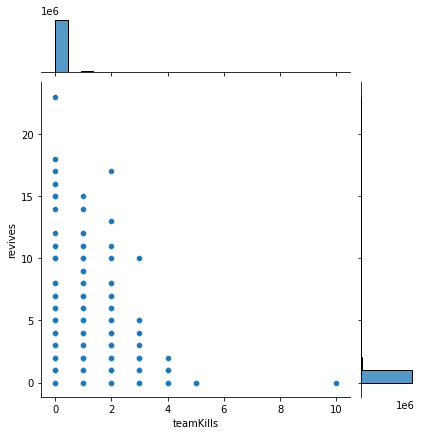

In [22]:
sns.jointplot(df['teamKills'], df['revives'])

#### From the above grpah we can see that if the person will harm its own teammembers then there wll  be a higher chances that no one will revive them.

<AxesSubplot:xlabel='roadKills', ylabel='kills'>

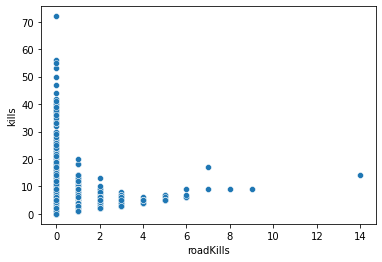

In [23]:
sns.scatterplot(df['roadKills'],df['kills'])

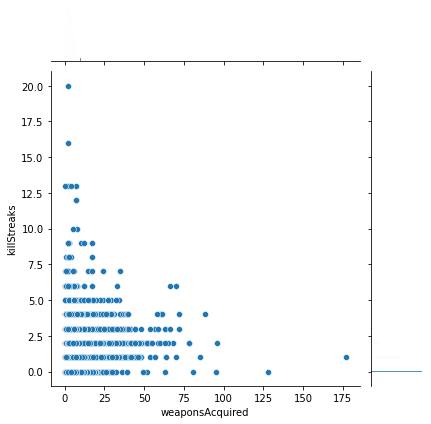

In [24]:
sns.jointplot(df['weaponsAcquired'], df['killStreaks'])

#### In this plot we can see that the people with the less weapons acuquired kills more enemies.But people with more weapons has a lower kill rate.That means here weapon is a factor but strategy matters.

#### In pubg game we have already heard about some cheating techniques, where players kills enemies without moving any distance.or having a headshot without acquiring a weapon

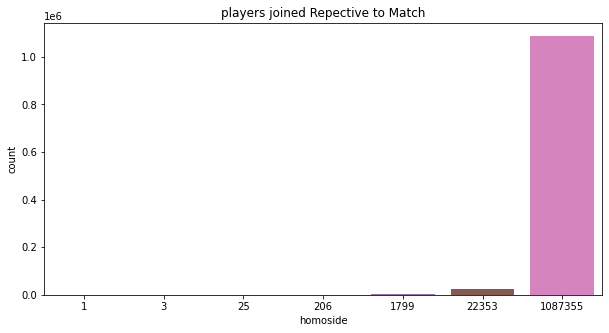

In [25]:
plt.figure(figsize=(10,5))

df['homoside']=df.groupby('teamKills')['teamKills'].transform('count')
sns.countplot(df['homoside'])
plt.title('players joined Repective to Match')
plt.show()

#### From the abpve plot we can see that the max number of players played in a match is 42. Most of the matches are played with 25 players

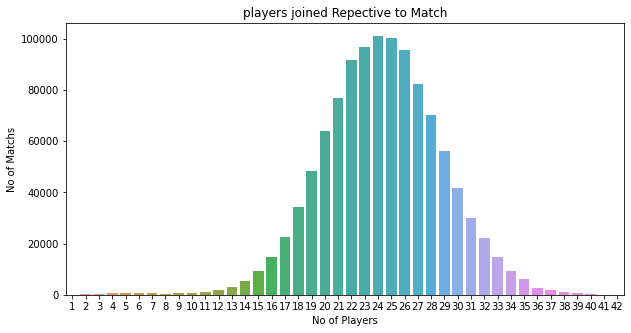

In [26]:
plt.figure(figsize=(10,5))

df['pl']=df.groupby('matchId')['matchId'].transform('count')
sns.countplot(df['pl'])
plt.title('players joined Repective to Match')
plt.xlabel('No of Players')
plt.ylabel('No of Matchs')
plt.show()

In [27]:
df['movingDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df[['movingDistance','kills']]

,movingDistance,kills
0,151.300,0
1,1918.000,0
2,4908.000,0
3,38.810,0
4,2639.400,1
...,...,...
1111737,799.800,0
1111738,4326.000,2
1111739,60.450,1
1111740,5819.000,0


In [28]:
df['killsWithoutMoving'] = ((df['kills'] > 0) & (df['movingDistance'] == 0))
df['killsWithoutMoving']

0          False
1          False
2          False
3          False
4          False
           ...  
1111737    False
1111738    False
1111739    False
1111740    False
1111741    False
Name: killsWithoutMoving, Length: 1111742, dtype: bool

In [29]:
display(df[df['killsWithoutMoving'] == True].shape)
df[['Id','weaponsAcquired','killsWithoutMoving', 'kills', 'movingDistance','headshotKills']][df['killsWithoutMoving'] == True].head(10)

(375, 33)

,Id,weaponsAcquired,killsWithoutMoving,kills,movingDistance,headshotKills
1267,c80731765f5704,19,True,9,0.0,1
2977,32cc8af554977f,1,True,1,0.0,0
5585,1ed752158c7bbc,27,True,4,0.0,1
9700,d4b5b144dbb5df,22,True,3,0.0,0
10092,861fd334addd94,14,True,5,0.0,0
14025,a4d301a7407a07,13,True,4,0.0,2
14964,e88981e06fc0e7,29,True,23,0.0,0
16337,778e65309ef561,13,True,4,0.0,1
17352,11463dca072357,12,True,5,0.0,3
19418,96805fcf390f3e,16,True,12,0.0,6


 These are the Players who have killed peoples without moving any distance and also they acquired weapon without moving, killed some enemies with headshot also. So we can conclude that, they were using some cheating techniques.

#### Now we'll analyse the longest-distance kills

Text(0.5, 0, 'Distance in Meters')

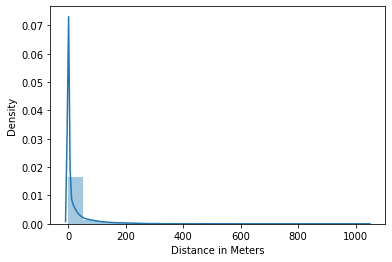

In [30]:
sns.distplot(df['longestKill'],bins=20)
plt.xlabel("Distance in Meters")

##### Most lethal weapon of sniper in pubg can shoot upto 1000meter,but it's also depends on the players.If They are shooting anybody gretaer than 1000m then he might be a good shooter or a cheater.